# Plotting
<div class="alert alert-block alert-info">
<h2>Overview</h2>

Questions:

* How do I visualize my data by making plots?
* How do I fit data to a function?

Objectives:

* Plot data to visualize results.
* Label plot axes and create a figure legend.
* Plot multiple graphs on one figure.
* Save figures to files.
* Use `matplotlib` for basic plotting
* Use `seaborn` for more statistical plotting

</div>


## Basic Plotting with MatPlotLib

To graph our data, we will need a new python library that contains functions to plot data. To plot our data, we will use a Python library called `matplotlib`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

First let's consider a simple set of x,y-data. This data has one independent variable (our x values) and one dependent variable (our y values). We will recast the data as numpy arrays, so we can use numpy features when we are evaluating our data. Note the basic plot requires only x-values and y-values. The 'o' is used so that individual points are drawn instead of a line (note '.' would also work and give smaller points).

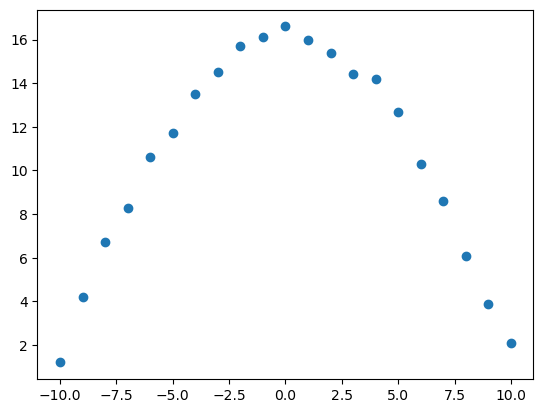

In [17]:
xdata = [ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
ydata = [1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1]

#Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata,'o') 


Now we will look at a plot with more information. We will load the tabular data in `distance_data_headers.csv` in the `data` folder, which was used in the file parsing tutorial. 

In [7]:
import os
import numpy

distance_file = os.path.join('data', 'distance_data_headers.csv')
distances = numpy.genfromtxt(distance_file, delimiter=',', dtype='unicode')
headers = distances[0]
data = distances[1:]
data = data.astype(float)

Now we will plot the molecular dynamics trajectory data contained in column 2 of this file (column 1 is the time step). First we initialize a figure and then plot the trajectory data. Notice that only the y-values are given to the plot function. In this case the default is for python to just create a list of integers starting at 0 for the x-axis values. In this case we also plot the line instead of using points.

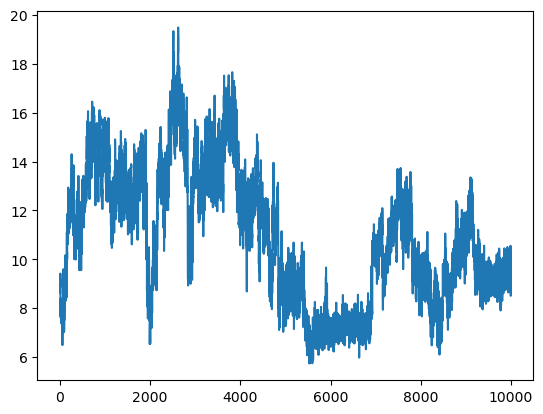

In [20]:
plt.plot(data[:,1]) # remember column index starts at 0

## Labeling plots and saving figures

But what information is our plot showing? We should label our axes and add a legend that tells us which sample this is. We can add x and y labels using the `xlabel` and `ylabel` functions. To add a label so we can use a legend on the plot, we add the `label` keyword to the `plot` function. We may also want to save our plot as an image so we can use it outside of this notebook. To do this, we use the `savefig` function.

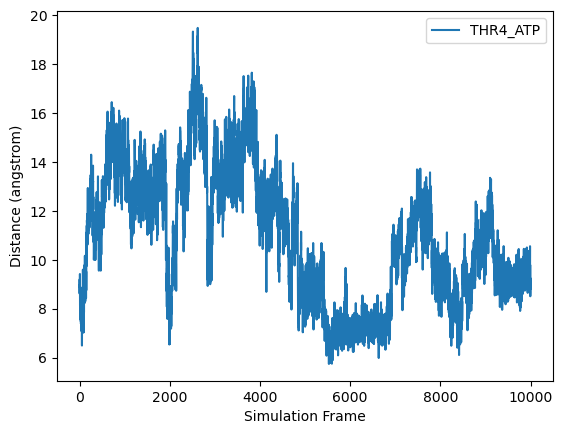

In [21]:
sample = headers[1]

plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
fig_1 = plt.plot(data[:,1], label=sample)
plt.legend()

plt.savefig(F'{sample}.png')


After executing this code, check the directory you are working in. You should have an image called `THR4_ATP.png` that looks like the one displayed above and in your notebook.

## Increasing image resolution

Often, when you preparing images for your research, you will want to increase the image quality or resolution. This is easy to do with the `savefig` command we have been using. To increase the resolution your image is saved as, add the command ‘dpi=NUMBER’ to the `savefig` command. dpi stands for “dots per inch”, and 300 is a resolution that is commonly used for publications.

Now, when you check your image, it should be much higher quality. One downside of increasing image resolution is that your figures will take longer to save. If you are making a lot of plots to quickly look at data, you will probably not want a high image resolution. You will probably only want to increase the image resolution when you know you want to use the plot.

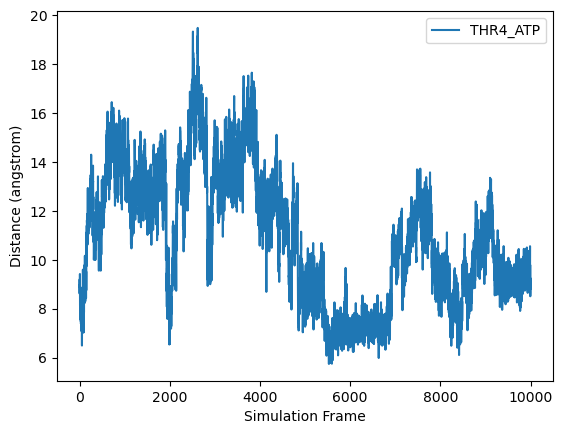

In [22]:
sample = headers[1]

plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
fig_1 = plt.plot(data[:,1], label=sample)
plt.legend()

plt.savefig(F'{sample}.png', dpi=300)

## Plotting more than one set of data

To plot more than one data set on the same graph, we just add another plot command.

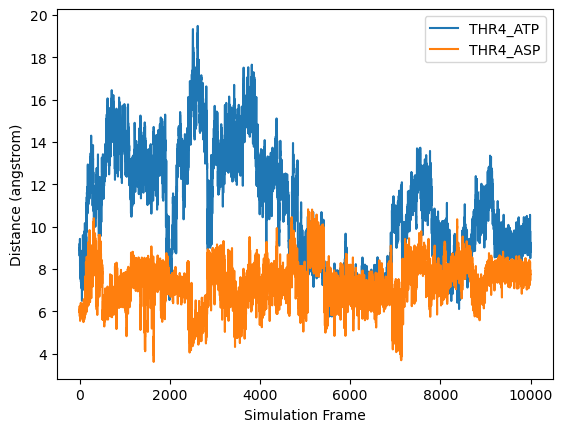

In [23]:
plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
plt.plot(data[:,1], label=headers[1])
plt.plot(data[:,2], label=headers[2])
plt.legend()
plt.savefig('two_samples.png')

If we want to plot all samples on the same plot, we can use a `for` loop to loop through all the columns. Here, we put the x and y labels and savefig command outside of the `for` loop since those things only need to be done once.

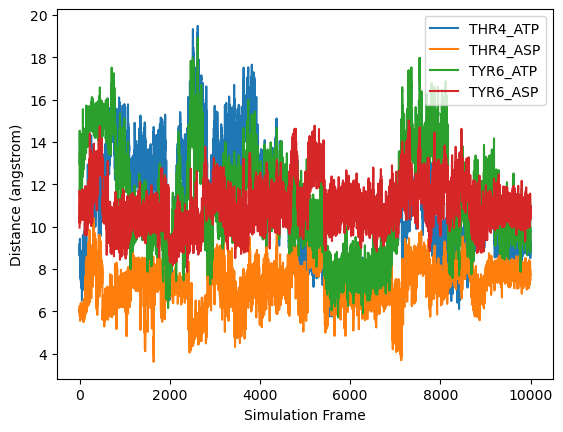

In [24]:
for col in range(1, len(headers)):
    fig = plt.plot(data[:,col], label=headers[col])
    plt.legend()

plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
plt.savefig('all_samples.png')

<div class="alert alert-block alert-warning"> 
<strong>Check your understanding</strong>
    
Make and save a separate plot for each sample. Make sure to use a separate file name for each.

</div>

### Normalizing axes across plots

For the plots showing our data so far, the y axis limits have all been different. Since these data sets are related, you may want to have all of the plots show the same axis ranges. We can manually set the y axis range of an axis for a plot using the command
```python
plt.ylim(low_limit, high_limit)
```
where `low_limit` and `high_limit` are the lowest number we want on our `y axis` and the highest number we want on our `y axis` respectively.

### Reducing number of points plotted

Sometimes it is helpful to not plot every point. Let’s try plotting every 100th frame of the trajectory data. To do this we will use a new slicing syntax. To select frames at regular intervals, we can use the syntax `array[start:stop:interval]`

For example, to get every other row to the 10th row, we would use a start of `0`, and end of `10`, and an increment of `2`. We then use the `:` to get every column. If you want to go to the end, leave out the end variable, and just use two colons ::.

In [27]:
print(data[0:10:2, :])

[[ 1.      8.9542  5.8024 11.5478  9.9557]
 [ 3.      9.0066  6.0637 13.0924 11.3043]
 [ 5.      9.1294  5.9365 13.5321 10.6279]
 [ 7.      8.8657  5.9186 12.9312 10.2176]
 [ 9.      9.4184  6.1993 13.2614 10.366 ]]


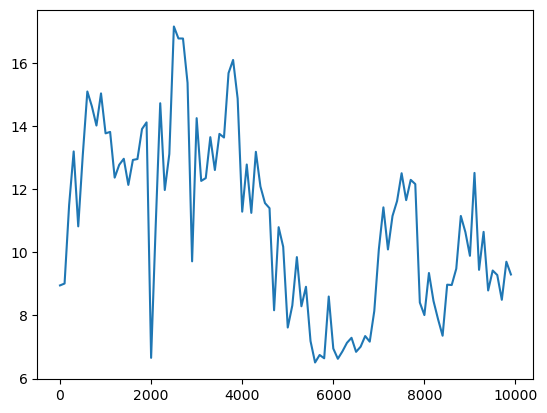

In [28]:
plt.plot(data[0::100,0], data[0::100,1]) # Plot of every 100 points

### Customizing plot appearance

We already discussed using points vs. a line, but can generally change the marker or line type by adding another argument after our `x` and `y` values. For example, we can make our line dashed by adding `'--'`.

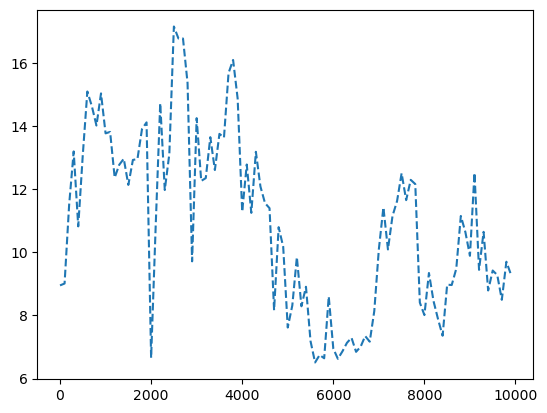

In [29]:
plt.plot(data[0::100,0], data[0::100,1], '--')

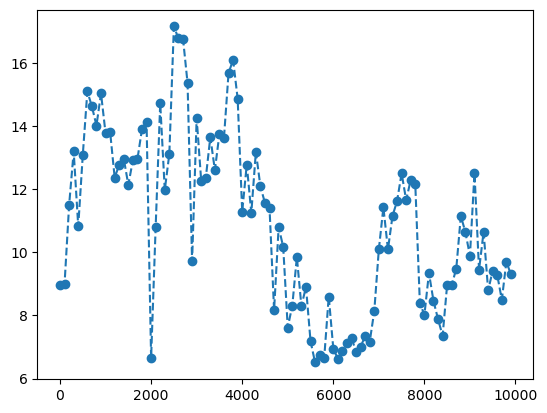

In [30]:
plt.plot(data[0::100,0], data[0::100,1], '--o') # combined effects

Here is a list of options you can use.

```python
character	description
'-'	solid line style
'--'    dashed line style
'-.'    dash-dot line style
':'	dotted line style
'.'	point marker
','	pixel marker
'o'	circle marker
'v'	triangle_down marker
'^'	triangle_up marker
'<'	triangle_left marker
'>'	triangle_right marker
'1'	tri_down marker
'2'	tri_up marker
'3'	tri_left marker
'4'	tri_right marker
's'	square marker
'p'	pentagon marker
'*'	star marker
'h'	hexagon1 marker
'H'	hexagon2 marker
'+'	plus marker
'x'	x marker
'D'	diamond marker
'd'	thin_diamond marker
'|'	vline marker
'_'	hline marker
```
You can also change the color using these options.

```python
character	color
'b'	blue
'g'	green
'r'	red
'c'	cyan
'm'	magenta
'y'	yellow
'k'	black
'w'	white
```

<div class="alert alert-block alert-warning"> 
<strong>Check your understanding</strong>
    
Modify the previous plot so that it has a dashed black line and triangular markers.

</div>

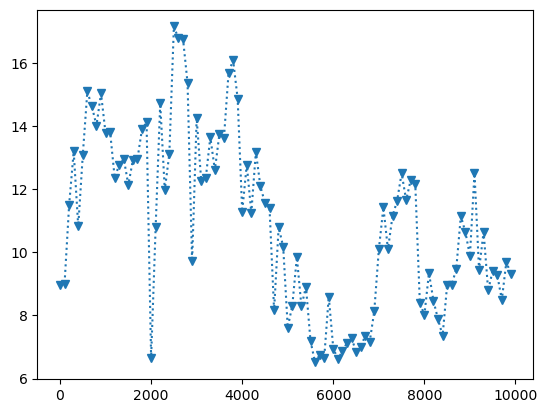

In [40]:
plt.plot(data[0::100,0], data[0::100,1], '--o') 

### Multiple Plots with Subplot

Instead of making multiple different figures with your plots, you might want to make one figure which has many plots. Matplotlib’s answer to this is `subplots`. To create a figure which has several plots, you use the syntax
```python
fig, ax = plt.subplots(nrows, ncolumns)
```
Subplot allows for you to lay plots out on a grid. You specify the number of rows and columns you want in your grid when you start.

Let’s create a subplot figure for our data. This should show four empty plots which are all part of the same figure. We have two variables which resulted from this function `fig` and `ax`. `Fig` is our figure, while `ax` is a numpy array that represents our figure axes. The shape of this array will be dependent on the shape we specify that we want our subplots.

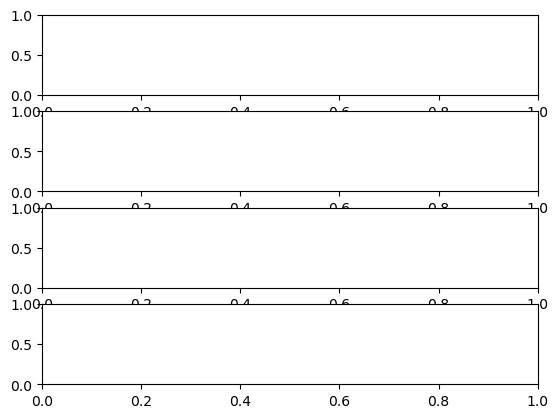

In [41]:
fig, ax = plt.subplots(len(headers)-1, 1)

In [42]:
ax.shape

(4,)

(2, 2)

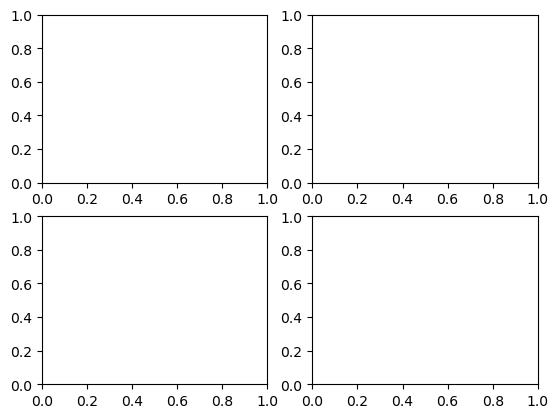

In [43]:
fig2, ax2 = plt.subplots(2,2) # change arrangment of subplots
ax2.shape

### Improving the figure

Let’s make this look a little nicer. We probably want the figure to be a little bigger. We can add another argument `figsize` to our `subplot` command. You specify the desired figure width and height in inches (it will not appear this size on your screen, but this will be the size when you save the figure).

Finally, you might want all of the y-axes to have the same limits. With subplots, we can achieve this by adding another argument `sharey=True` to make all the y axes the same (you can also do this with `sharex`, but we don’t need to).

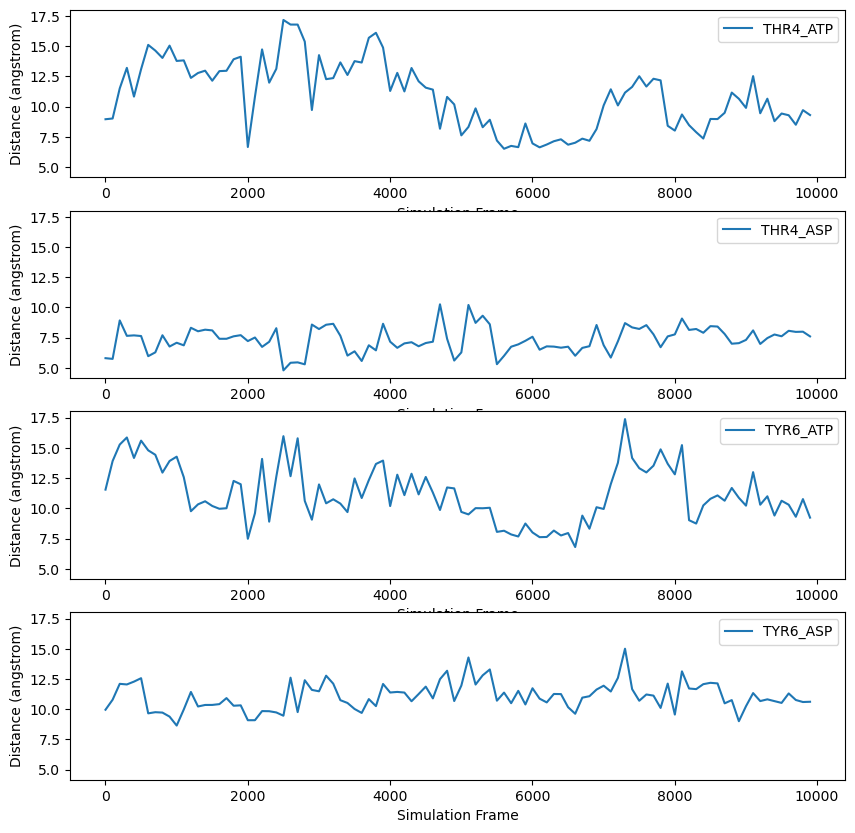

In [44]:
fig, ax = plt.subplots(len(headers)-1, 1, figsize=(10, 10), sharey=True)
#fig.set_figheight(10)

for col in range(1, len(headers)):
    sample = headers[col]
    
    ax[col-1].plot(data[0::100,0], data[0::100,col], label=sample)
    ax[col-1].set_xlabel('Simulation Frame')
    ax[col-1].set_ylabel('Distance (angstrom)')
    ax[col-1].legend()

<div class="alert alert-block alert-success"> 
<strong>Key Points</strong>

* The `matplotlib` library is the most commonly used plotting library.
* You can import libraries with shorthand names.
* You can save a figure with the `savefig` command.
* Matplotlib is highly customizable. You can change the style of your plot, and there are many kinds of plots.


</div>  

## Plotting with Seaborn

Seaborn is a statistical data visualization library that makes statistical plotting very straightforward.

First we will load in the seaborn library and the periodic table data we previously used. Pandas is also needed for reading in the periodic table data.

In [45]:
# import seaborn
import seaborn as sns
import pandas as pd

#read in csv file
df = pd.read_csv("data/PubChemElements_all.csv")

Let's start by looking for a linear relationship between atomic mass and melting point. `lmplot` gives a scatter plot of the data and a linear fit with a 95% confidence interval.

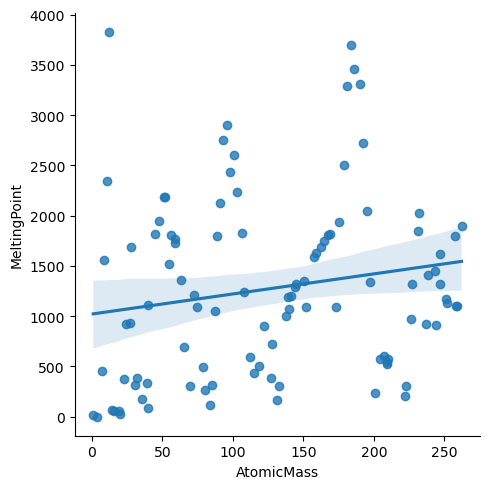

In [46]:
# Visualize Linear Relationship (default 95% confidence best fit)
g = sns.lmplot(x="AtomicMass",y="MeltingPoint", data=df)

We can also color the data by a category, in this case the group it belongs to in the periodic table. This uses another built in seaborn graph type called `relplot`

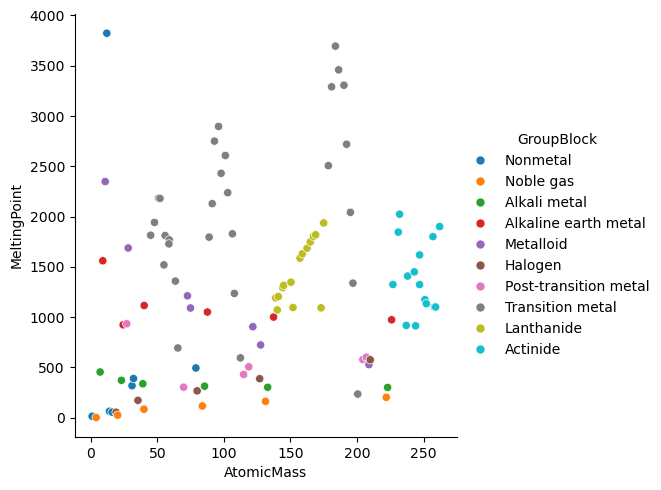

In [48]:
# visualize relational data
g=sns.relplot(x="AtomicMass",y="MeltingPoint", data=df,hue= "GroupBlock")

If we select just the numerical data, we can use seaborn to explore relationships between all pairs of variables. In this case we will try and determine which values correlate with the boiling point. Boiling point is on the y-axis and other numerical values are on the x axis

In [55]:
# Get numerical columns
df_numeric = df.select_dtypes(include="number")

# change the dimensions of the data
df_melt = df_numeric.melt(id_vars="BoilingPoint")

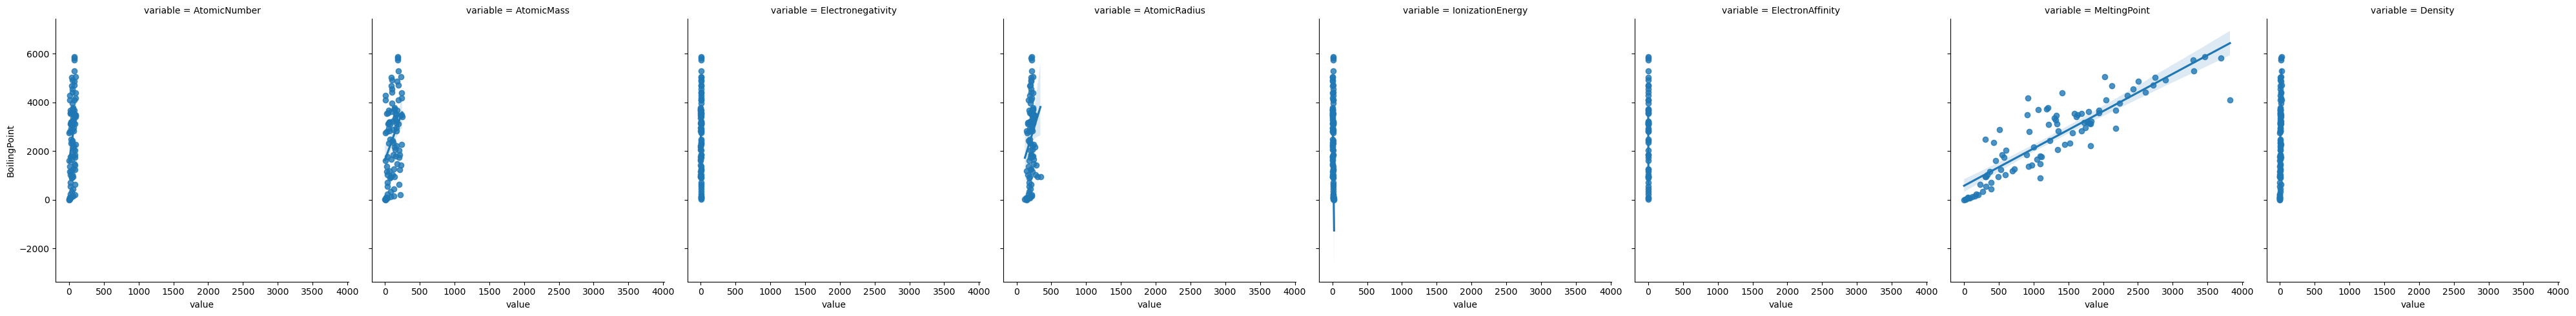

In [56]:
g=sns.lmplot(data=df_melt,y="BoilingPoint",x="value", col="variable")

This is challenging to view. To make it better, we need to use separate x-axes.

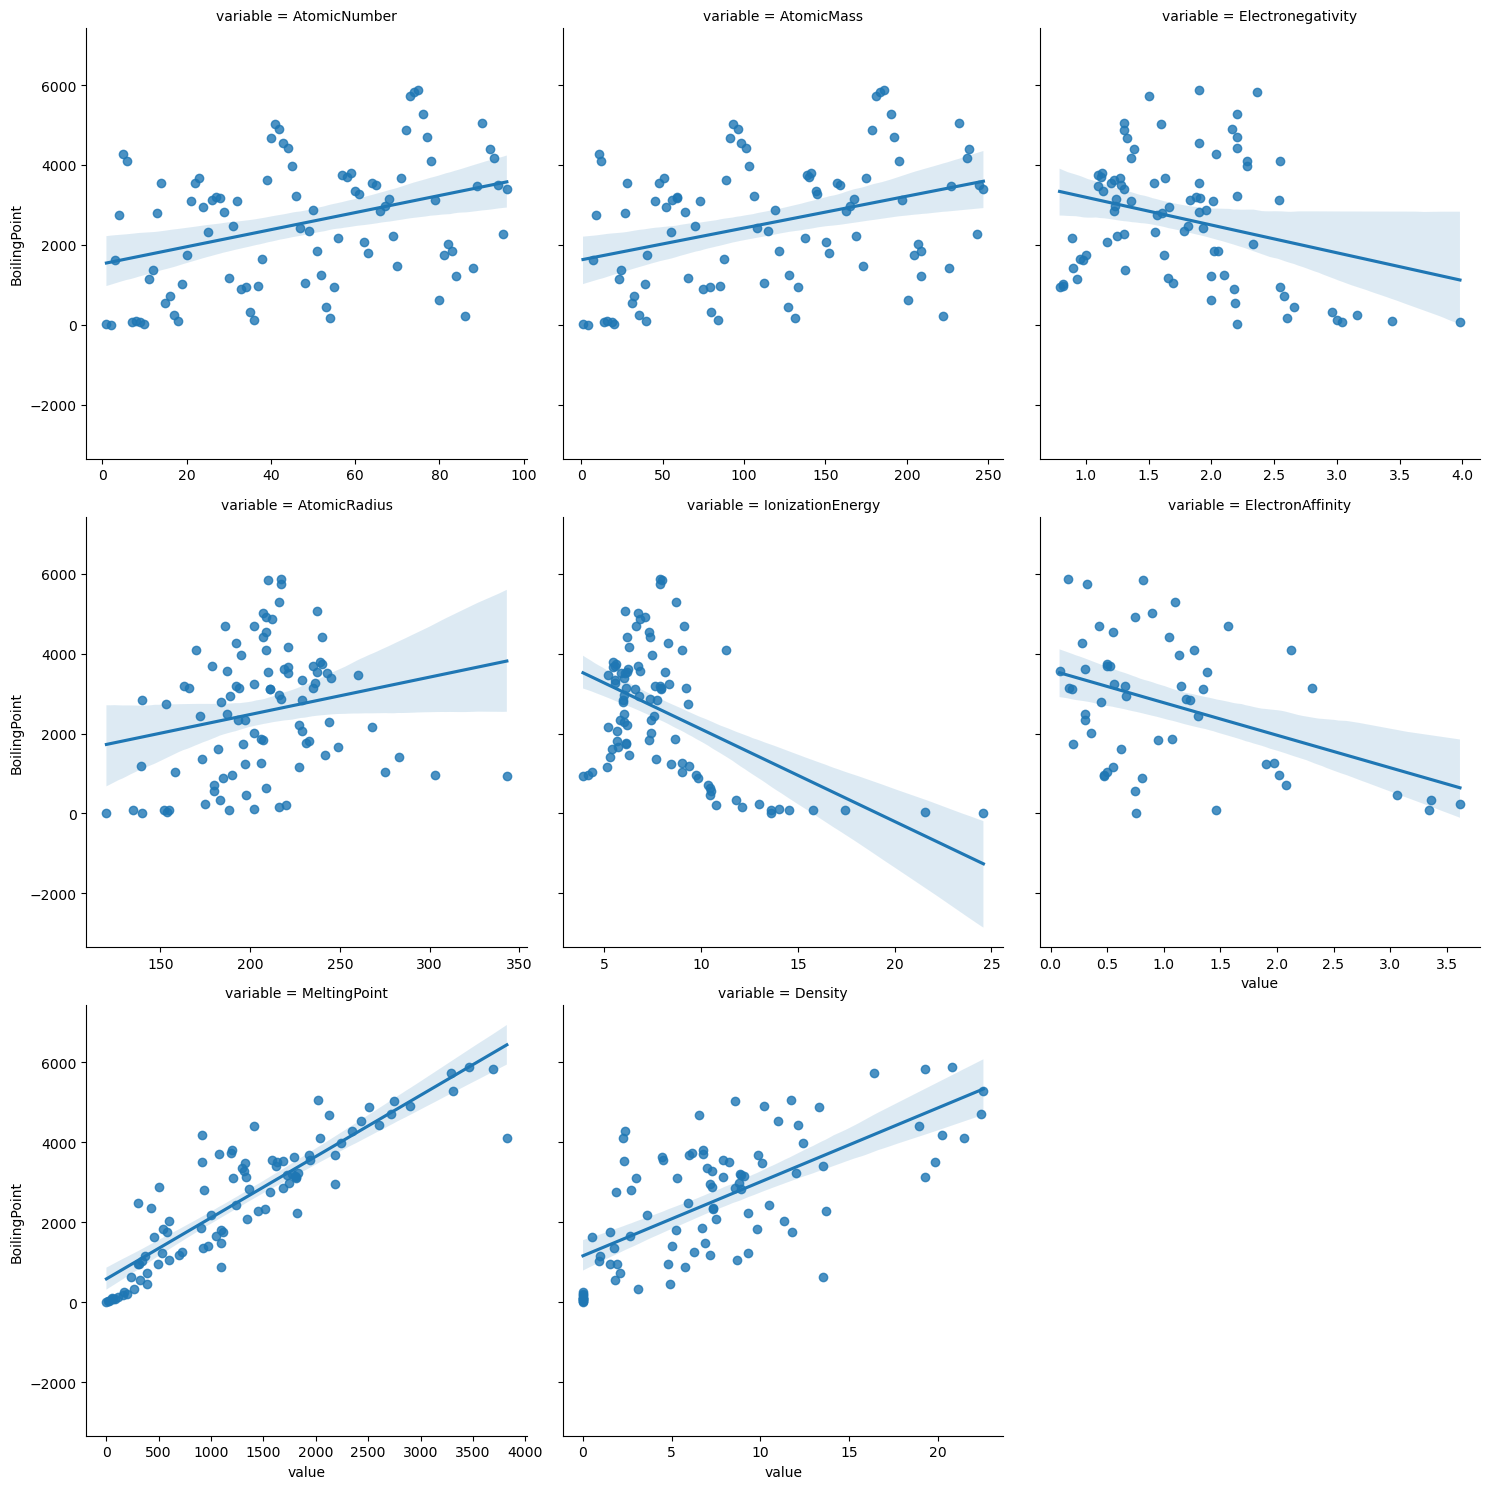

In [58]:
g=sns.lmplot(data=df_melt,y="BoilingPoint",x="value", col="variable", col_wrap=3, facet_kws={"sharex":False})

To determine the variables that best contribute, calculate the correlation matrix.

In [59]:
# correlation
df_numeric.corr()

,AtomicNumber,AtomicMass,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,MeltingPoint,BoilingPoint,Density
AtomicNumber,1.000000,0.999258,-0.333108,0.108260,-0.436061,0.033849,0.186428,0.368187,0.725570
AtomicMass,0.999258,1.000000,-0.332860,0.103125,-0.421957,0.035010,0.176436,0.358071,0.720749
Electronegativity,-0.333108,-0.332860,1.000000,-0.658565,0.904801,0.712926,-0.118976,-0.288225,-0.085101
AtomicRadius,0.108260,0.103125,-0.658565,1.000000,-0.641088,-0.317003,0.057317,0.213469,0.187537
IonizationEnergy,-0.436061,-0.421957,0.904801,-0.641088,1.000000,0.695265,-0.327232,-0.499358,-0.332260
ElectronAffinity,0.033849,0.035010,0.712926,-0.317003,0.695265,1.000000,-0.294207,-0.423421,-0.068024
MeltingPoint,0.186428,0.176436,-0.118976,0.057317,-0.327232,-0.294207,1.000000,0.888202,0.571981
BoilingPoint,0.368187,0.358071,-0.288225,0.213469,-0.499358,-0.423421,0.888202,1.000000,0.684276
Density,0.725570,0.720749,-0.085101,0.187537,-0.332260,-0.068024,0.571981,0.684276,1.000000


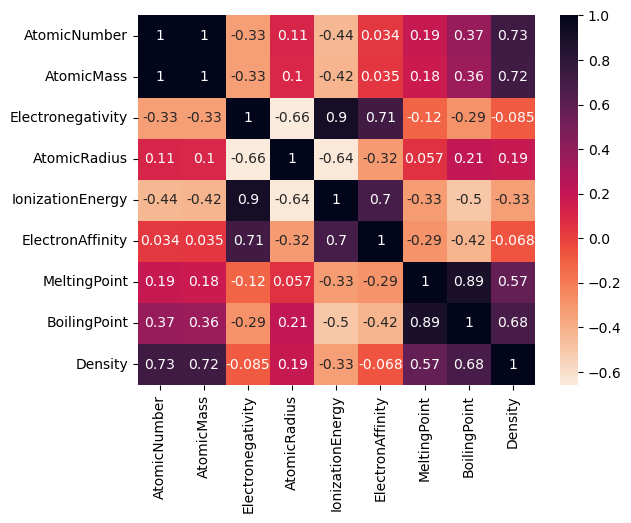

In [60]:
# visualize correlation between columns
g = sns.heatmap(df_numeric.corr(), cmap="rocket_r", annot=True)

<div class="alert alert-block alert-success"> 
<strong>Key Points</strong>

* The `seaborn` library provides a powerful way of visualizing data with minimal input.
* It couples very closely with the pandas dataframes


</div>  